# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who:

Healthcare professionals, such as doctors, nurses, and hospital administrators, who need to identify and monitor patients at risk of chronic kidney disease (CKD).

What:
Show the key indicators and patterns in patient health data (such as age, blood pressure, creatinine levels, etc.) that are most associated with CKD diagnosis.

How:
Use clear visuals like bar charts or line plots to highlight trends in these health indicators, compare patients with and without CKD, and guide decisions on early intervention or treatment.

# 3. Homework - work with your own data

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [30]:
import pandas as pd

df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")
print("Dataset Info:\n")
df.info()
print("\nSummary Statistics:\n")
print(df.describe(include='all')) 

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     16

In [31]:
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"Number of duplicate rows: {num_duplicates}") 

Number of duplicate rows: 0


In [32]:
if column in df.columns:
    num_duplicate_values = df[column].duplicated().sum()
    print(f"Number of duplicate values in '{column}': {num_duplicate_values}")
else:
    print(f"Column '{column}' not found in the dataset.") 

Column 'id' not found in the dataset.


In [33]:
import pandas as pd

print("Mean:\n", df.mean(numeric_only=True), "\n")
print("Median:\n", df.median(numeric_only=True), "\n")
print("Mode:\n", df.mode().iloc[0], "\n") 

Mean:
 PatientID                        830.000000
Age                               54.441230
Gender                             0.515371
Ethnicity                          0.713080
SocioeconomicStatus                0.977697
EducationLevel                     1.693189
BMI                               27.620049
Smoking                            0.292948
AlcoholConsumption                 9.969831
PhysicalActivity                   5.024247
DietQuality                        5.028544
SleepQuality                       6.942324
FamilyHistoryKidneyDisease         0.141049
FamilyHistoryHypertension          0.301386
FamilyHistoryDiabetes              0.257384
PreviousAcuteKidneyInjury          0.105485
UrinaryTractInfections             0.210368
SystolicBP                       134.392405
DiastolicBP                       89.313442
FastingBloodSugar                132.529429
HbA1c                              6.983682
SerumCreatinine                    2.753198
BUNLevels                

In [34]:
print("Missing values per column:\n")
print(df.isnull().sum()) 

Missing values per column:

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium 

In [35]:
print(df.columns)
invalid_ages = df[(df['Age'] < 0) | (df['Age'] > 120)]
print("Suspicious age values:\n", invalid_ages) 

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

In [36]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:\n", categorical_cols)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) 

Categorical columns:
 Index(['DoctorInCharge'], dtype='object')


Data is usable for 

Data exploration

Modeling

Visualization

In [37]:
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].fillna(df[col].mode()[0]) 


Yes, I needed to make some changes to data:

1. Missing values:

For number columns, I filled missing data with the median (middle value).

For text columns, I filled missing data with the mode (most common value).

2. Fixing warnings:

I updated how I filled missing values to avoid future errors in pandas.

Checking for wrong data:

I looked for unusual values (like a negative age) and didn’t find anything obviously wrong.

3. Changing text to numbers:

I used one-hot encoding to turn text columns into numbers so I can use them in analysis or machine learning.

In [38]:
print(df['PatientID'].value_counts())
print("\nPercentage breakdown:")
print(df['PatientID'].value_counts(normalize=True) * 100) 

PatientID
1659    1
1       1
2       1
3       1
4       1
       ..
16      1
15      1
14      1
13      1
12      1
Name: count, Length: 1659, dtype: int64

Percentage breakdown:
PatientID
1659    0.060277
1       0.060277
2       0.060277
3       0.060277
4       0.060277
          ...   
16      0.060277
15      0.060277
14      0.060277
13      0.060277
12      0.060277
Name: proportion, Length: 1659, dtype: float64


There is class imbalance in the PatientID column, but that’s actually expected. Each PatientID should be unique, representing a single individual. If some IDs appear more than once, it could indicate duplicate or repeated records, which I would need to investigate. However, class imbalance in PatientID isn't a problem like it would be in a target variable—it just helps identify how many unique patients are in the dataset.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

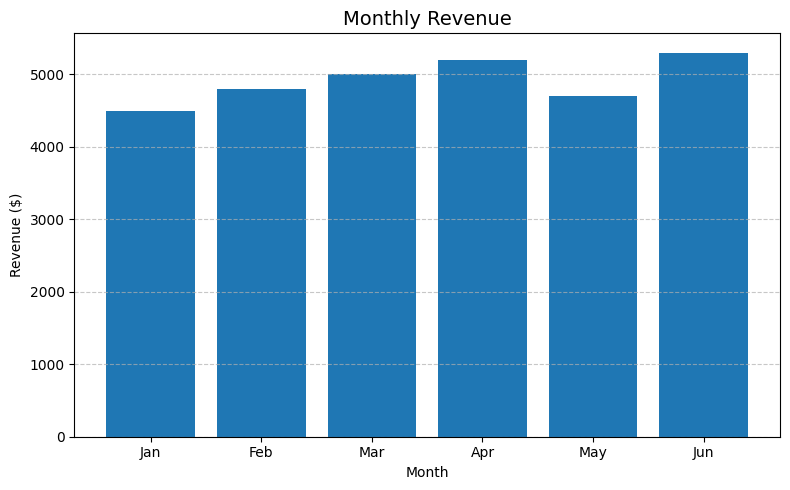

In [39]:
import matplotlib.pyplot as plt

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
revenue = [4500, 4800, 5000, 5200, 4700, 5300]
plt.figure(figsize=(8, 5))
plt.bar(months, revenue, color='#1f77b4')
plt.title('Monthly Revenue', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 